In [7]:
import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [8]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values


In [9]:
kf = KFold(n_splits=5, shuffle=True)

model = DecisionTreeClassifier()

for train_index, test_index in kf.split(X):
    # Split test and train datasets4
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define the model architecture

    # Train the model
    _ = model.fit(X_train, y_train)


Test accuracy: 0.954


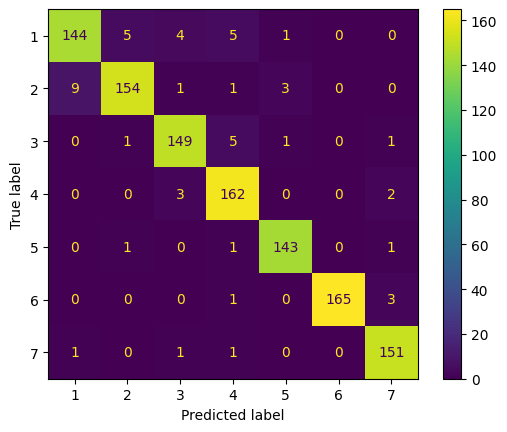

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Generating the confusion matrix for the model
conf_mat = np.array(confusion_matrix(y_test, y_pred))
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()


In [11]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.94      0.91      0.92       159
           2       0.96      0.92      0.94       168
           3       0.94      0.95      0.95       157
           4       0.92      0.97      0.94       167
           5       0.97      0.98      0.97       146
           6       1.00      0.98      0.99       169
           7       0.96      0.98      0.97       154

    accuracy                           0.95      1120
   macro avg       0.95      0.95      0.95      1120
weighted avg       0.95      0.95      0.95      1120



In [6]:
model_name = "decision_tree_v2"

pickle.dump(model,open(f"models/{model_name}.pickle","wb"))
model = pickle.load(open(f"models/{model_name}.pickle","rb"))